In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

import pandas as pd
with open('ForbesAmericasTopColleges2019.csv', newline='') as data:
    forbesraw = pd.read_csv(data)

#type(forbesraw)

In [ ]:
#print(forbesraw)
#print(forbesraw.describe())
print(forbesraw.columns)

Index(['Rank', 'Name', 'City', 'State', 'Public/Private',
       'Undergraduate Population', 'Student Population', 'Net Price',
       'Average Grant Aid', 'Total Annual Cost', 'Alumni Salary',
       'Acceptance Rate', 'SAT Lower', 'SAT Upper', 'ACT Lower', 'ACT Upper',
       'Website'],
      dtype='object')


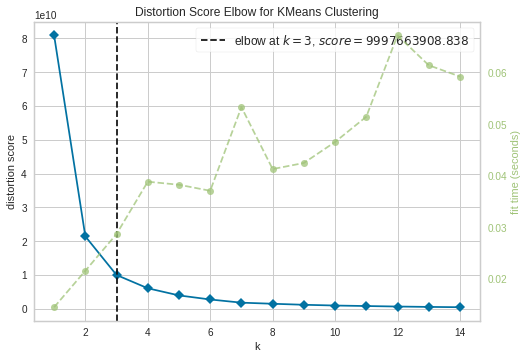

Calculated Clusters: 3


In [ ]:
# Determine how many clusters needed for dataset using elbow method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15)).fit(forbesraw[["Undergraduate Population", "Rank"]])
visualizer.show()
print("Calculated Clusters:", visualizer.elbow_value_) # print number of suggested clusters

In [ ]:
# Apply KMeans clustering to dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(forbesraw[["Undergraduate Population", "Rank"]])

In [ ]:
# Clustering information
#kmeans.labels_ # cluster label for each data point
#kmeans.inertia_ # total within-cluster sum of squares for all clusters
#kmeans.n_iter_ # number of iterations for kmeans to get minimum within-cluster sum of squares
#kmeans.cluster_centers_ # locations of centroids

In [ ]:
# Get cluster sizes
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 435, 1: 73, 2: 142})

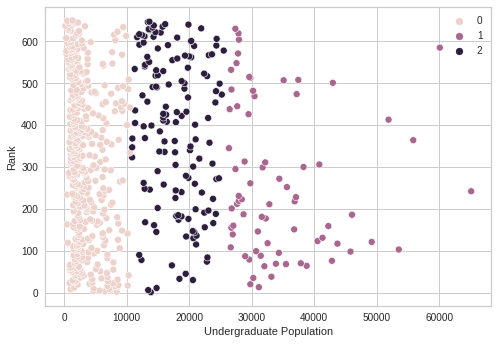

In [ ]:
# KMeans clustering plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=forbesraw[["Undergraduate Population", "Rank"]], x="Undergraduate Population", y="Rank", hue=kmeans.labels_)
plt.show()

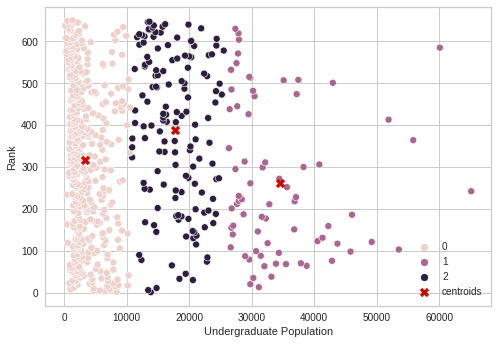

In [ ]:
# KMeans clustering plot with centroids
sns.scatterplot(data=forbesraw[["Undergraduate Population", "Rank"]], x="Undergraduate Population", y="Rank", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()